In [ ]:
print("Hello World")

Hello World


In [ ]:
import pandas as pd
df= pd.read_csv('/content/sample_data/E-commerce-data.csv')

In [ ]:
df

,Period,Payment,Channel,Dest Zone,Remarks,Count,State,Country
0,Feb W1,COD,APP,EAST,Verified Orders,41387,ORISSA,India
1,Feb W1,COD,APP,EAST,Verified Orders,42652,ORISSA,India
2,Feb W1,COD,APP,EAST,Verified Orders,38427,WEST BENGAL,India
3,Feb W1,COD,APP,EAST,Verified Orders,37933,WEST BENGAL,India
4,Feb W1,COD,APP,METRO,Verified Orders,59200,DELHI,India
...,...,...,...,...,...,...,...,...
2011,Mar W4,STD,PC,METRO,Post-Ship,206,HARYANA,India
2012,Mar W4,STD,PC,METRO,Post-Ship,20,HARYANA,India
2013,Mar W4,STD,PC,METRO,Post-Ship,114,KARNATAKA,India
2014,Mar W4,STD,PC,METRO,Post-Ship,107,KARNATAKA,India


In [ ]:
df.head()

,Period,Payment,Channel,Dest Zone,Remarks,Count,State,Country
0,Feb W1,COD,APP,EAST,Verified Orders,41387,ORISSA,India
1,Feb W1,COD,APP,EAST,Verified Orders,42652,ORISSA,India
2,Feb W1,COD,APP,EAST,Verified Orders,38427,WEST BENGAL,India
3,Feb W1,COD,APP,EAST,Verified Orders,37933,WEST BENGAL,India
4,Feb W1,COD,APP,METRO,Verified Orders,59200,DELHI,India


In [ ]:
df['Remarks'].unique()

array(['Verified Orders', 'Pre-Manifest', 'M2S', 'Post-Ship'],
      dtype=object)

In [ ]:
effective_df=df[df['Remarks']!='Verified Orders']
effective_df

,Period,Payment,Channel,Dest Zone,Remarks,Count,State,Country
504,Feb W1,COD,APP,TIER 2,Pre-Manifest,3179,KARNATAKA,India
505,Feb W1,COD,APP,TIER 2,Pre-Manifest,2912,KERALA,India
506,Feb W1,COD,APP,TIER 2,Pre-Manifest,2037,MADHYA PRADESH,India
507,Feb W1,COD,APP,TIER 2,Pre-Manifest,2657,MAHARASHTRA,India
508,Feb W1,COD,APP,TIER 2,Pre-Manifest,3962,TAMIL NADU,India
...,...,...,...,...,...,...,...,...
2011,Mar W4,STD,PC,METRO,Post-Ship,206,HARYANA,India
2012,Mar W4,STD,PC,METRO,Post-Ship,20,HARYANA,India
2013,Mar W4,STD,PC,METRO,Post-Ship,114,KARNATAKA,India
2014,Mar W4,STD,PC,METRO,Post-Ship,107,KARNATAKA,India


In [ ]:
total_count=effective_df['Count'].sum()
total_count

1196517

<Axes: ylabel='Count'>

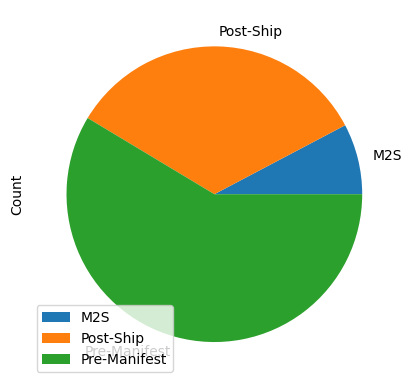

In [ ]:
effective_df.groupby(('Remarks')).sum().plot(kind='pie',y='Count')

<Axes: ylabel='Count'>

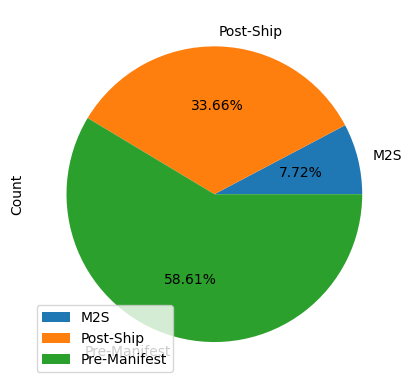

In [ ]:
effective_df.groupby(('Remarks')).sum().plot(kind='pie',y='Count',autopct='%1.2f%%')

In [ ]:
df2=effective_df.groupby(['Period','Remarks']).agg({'Count':['sum']})
df2

Count
                        sum
Period Remarks             
Apr W1 M2S             5189
       Post-Ship      19658
       Pre-Manifest   15977
Apr W2 M2S             5205
       Post-Ship      15381
       Pre-Manifest   33776
Feb W1 M2S             6418
       Post-Ship      25911
       Pre-Manifest   34185
Feb W2 M2S             6270
       Post-Ship      23025
       Pre-Manifest   28171
Feb W3 M2S             5775
       Post-Ship      20733
       Pre-Manifest   24699
Feb W4 M2S             6728
       Post-Ship      21896
       Pre-Manifest   28411
Jan W1 M2S             8809
       Post-Ship      53645
       Pre-Manifest  118531
Jan W2 M2S             9315
       Post-Ship      56986
       Pre-Manifest  124964
Jan W3 M2S             9008
       Post-Ship      48444
       Pre-Manifest  106612
Jan W4 M2S            10026
       Post-Ship      49972
       Pre-Manifest  103599
Mar W1 M2S             4470
       Post-Ship      14790
       Pre-Manifest   21163
Mar W2 M2S             4982
       Post-Ship      11373
       Pre-Manifest   21512
Mar W3 M2S             3696
       Post-Ship      14858
       Pre-Manifest   18964
Mar W4 M2S             6530
       Post-Ship      26104
       Pre-Manifest   20756

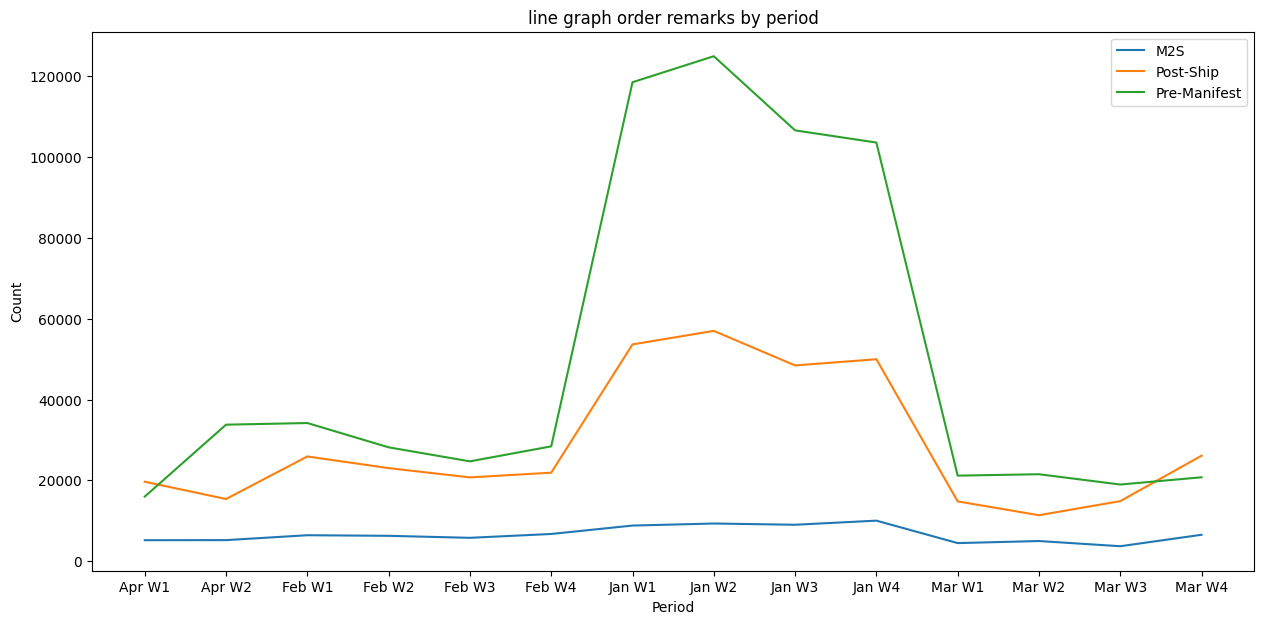

In [ ]:
import matplotlib.pyplot as plt

df2.reset_index(inplace=True)
plt.figure(figsize=(15,7))

for name, group in df2.groupby('Remarks'):
  plt.plot(group['Period'], group['Count']['sum'],label=name)

plt.title('line graph order remarks by period')
plt.xlabel('Period')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df3=effective_df.groupby(['Channel','Remarks']).agg({'Count':['sum']})
df3

Count
                         sum
Channel Remarks             
APP     M2S            73446
        Post-Ship     293317
        Pre-Manifest  508629
M-Site  M2S             9518
        Post-Ship      57976
        Pre-Manifest  112780
PC      M2S             9457
        Post-Ship      51483
        Pre-Manifest   79911

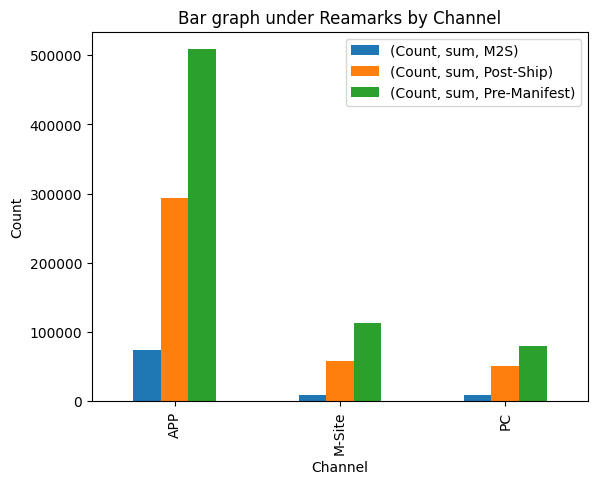

In [ ]:
df3.unstack().plot(kind='bar')
plt.title('Bar graph under Reamarks by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df4=effective_df.groupby(['State']).agg({'Count':['sum']})
df4

,Count
,sum
State,
ANDHRA PRADESH,100576
ARUNACHAL PRADESH,2559
ASSAM,15558
BIHAR,38584
CHANDIGARH,27506
CHHATTISGARH,55386
DADRA & NAGAR HAVELI,17036
DAMAN & DIU,11535


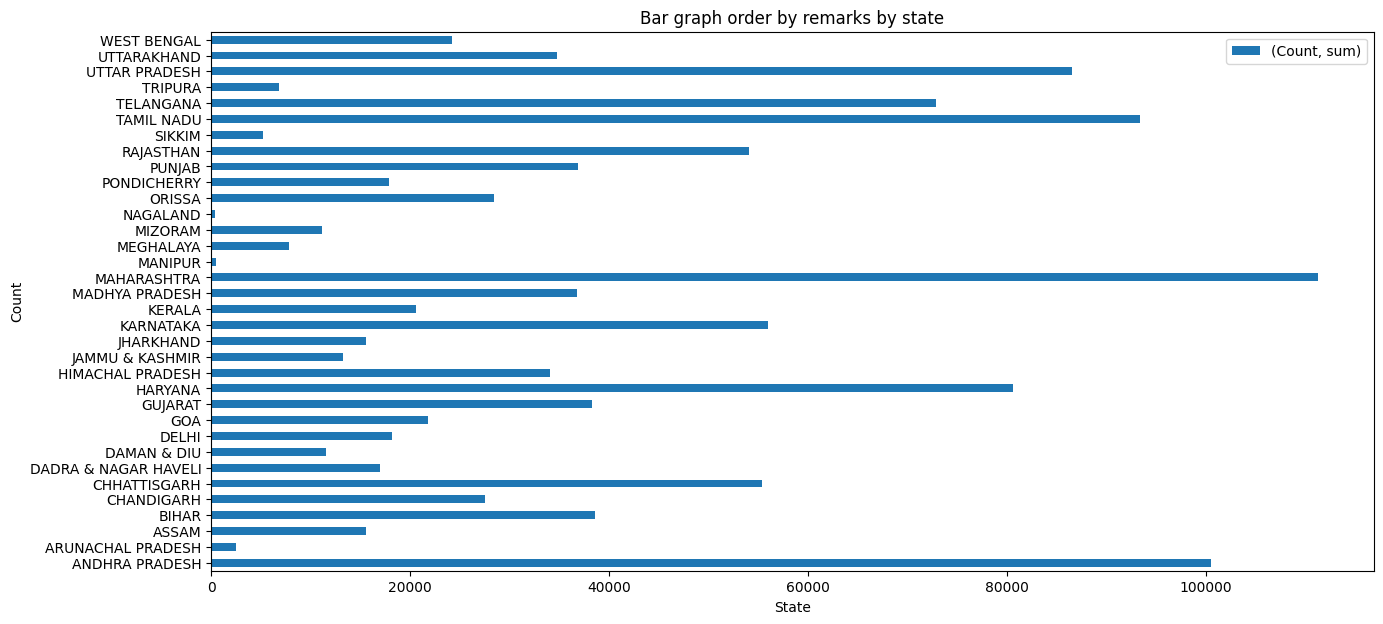

In [ ]:
df4.plot(kind='barh',figsize=(15,7))
plt.legend()
plt.title("Bar graph order by remarks by state")
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

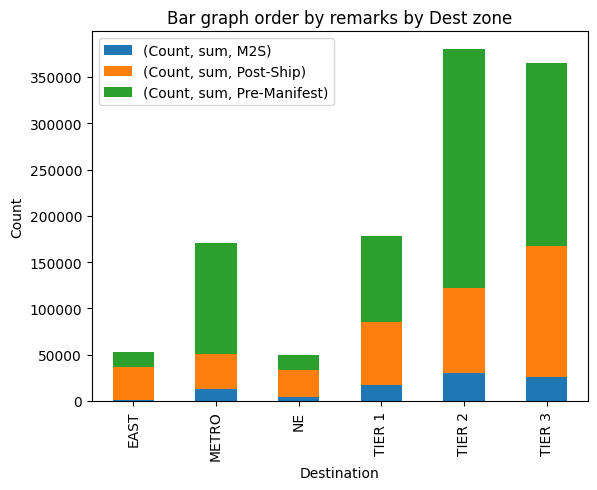

In [ ]:
df5.unstack().plot(kind='bar',stacked=True)
plt.legend()
plt.title("Bar graph order by remarks by Dest zone")
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

In [ ]:
df6=df.groupby(['Payment']).agg({'Count':['sum']})
df6['% Share']=100*df6['Count','sum']/df6[('Count','sum')].sum()
df6

,Count,% Share
,sum,
Payment,,
COD,8235152,70.911789
STD,3378082,29.088211


<Axes: ylabel='sum'>

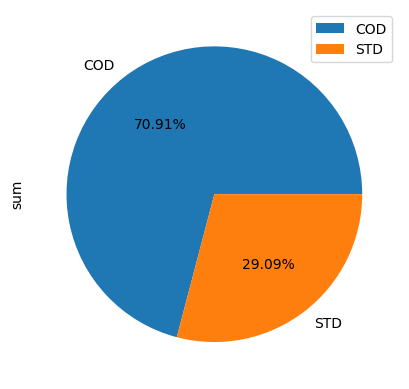

In [ ]:
df6.plot(kind='pie',y='Count',autopct='%1.2f%%')

In [ ]:
df5=effective_df.groupby(['Dest Zone','Remarks']).agg({'Count':['sum']})
df5

Count
                           sum
Dest Zone Remarks             
EAST      M2S              958
          Post-Ship      35984
          Pre-Manifest   15793
METRO     M2S            13468
          Post-Ship      37483
          Pre-Manifest  120022
NE        M2S             4231
          Post-Ship      29259
          Pre-Manifest   16454
TIER 1    M2S            17543
          Post-Ship      67653
          Pre-Manifest   92579
TIER 2    M2S            30182
          Post-Ship      91474
          Pre-Manifest  258559
TIER 3    M2S            26039
          Post-Ship     140923
          Pre-Manifest  197913